In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.font_manager

from requests import get
from urllib.parse import urlparse

# For debugging purposes (fonts can be hard)
print(matplotlib.get_cachedir())

# We change fonts the hard way in this notebook...
# but you can also do this to change the default 
# font everywhere in one go:
# matplotlib.rcParams['font.family'] = "Liberation Sans Narrow"
fontname = "DejaVu Sans"

matplotlib.font_manager.FontManager().findfont(fontname, fontext='ttf', rebuild_if_missing=True)

/home/jovyan/.cache/matplotlib


'/opt/conda/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [2]:


def cache_data(src:str, dest:str) -> str:
    """
    
    Downloads and caches a file from the given URL if it does not already exist locally 
    or if the cached file is smaller than 250 bytes.

    Args:
        src (str): The source URL to download the file from.
        dest (str): The destination directory where the file should be stored.

    Returns:
        str: The full path to the cached or downloaded file.

    Behavior:
        - Parses the URL to extract the filename.
        - Constructs the full destination path for the file.
        - Checks if the file already exists in the destination directory and if its size 
          is at least 250 bytes.
        - If the file is not present or is too small, downloads the file from the URL 
          and saves it in the specified directory, creating directories if needed.
        - If the file is already present and meets the size condition, it skips the 
          download.

    Note:
        - The function uses the `requests` library for HTTP requests.
        - If the destination directory does not exist, it is created automatically.
    
    
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn) or os.path.getsize(dfn) < 250:
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:  # write in binary
            response = get(src)
            file.write(response.content)  
            #response.content:response.content 
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

help(cache_data) # <- This should show the docstring you've written

Help on function cache_data in module __main__:

cache_data(src: str, dest: str) -> str
    Downloads and caches a file from the given URL if it does not already exist locally 
    or if the cached file is smaller than 250 bytes.
    
    Args:
        src (str): The source URL to download the file from.
        dest (str): The destination directory where the file should be stored.
    
    Returns:
        str: The full path to the cached or downloaded file.
    
    Behavior:
        - Parses the URL to extract the filename.
        - Constructs the full destination path for the file.
        - Checks if the file already exists in the destination directory and if its size 
          is at least 250 bytes.
        - If the file is not present or is too small, downloads the file from the URL 
          and saves it in the specified directory, creating directories if needed.
        - If the file is already present and meets the size condition, it skips the 
          download.
    
   

```
# Set download URL
ymd  = '20240614'
city = 'London'
host = 'https://orca.casa.ucl.ac.uk'
url  = f'{host}/~jreades/data/{ymd}-{city}-listings.csv.gz'
# your code here
df = pd.read_csv(url, compression='gzip', low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}") 
```

# Data load

```
df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=cols)
df.info(verbose=True)
```

## listing data load 

In [3]:
# Set download URL
ymd  = '20240614'
city = 'London'
host = 'https://orca.casa.ucl.ac.uk'
url  = f'{host}/~jreades/data/{ymd}-{city}-listings.csv.gz'

In [4]:
path = os.path.join('data','raw') # A default location to save raw data
fn   = url.split('/')[-1]         # What does this do?
print(f"Writing to: {fn}")

df = pd.read_csv(cache_data(url, os.path.join('data','raw')))
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Writing to: 20240614-London-listings.csv.gz
Found data/raw/20240614-London-listings.csv.gz locally!
Data frame is 93,481 x 75


## geo data load

In [5]:
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/i2p/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )
road =  gpd.read_file( cache_data(spath+'Roads.gpkg?raw=true', ddir) )
print('Done.')

Found data/geo/Boroughs.gpkg locally!
Found data/geo/Water.gpkg locally!
Found data/geo/Greenspace.gpkg locally!
Found data/geo/Roads.gpkg locally!
Done.


## choose cols needed in listing data

In [6]:
# airbnb listing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            93481 non-null  int64  
 1   listing_url                                   93481 non-null  object 
 2   scrape_id                                     93481 non-null  int64  
 3   last_scraped                                  93481 non-null  object 
 4   source                                        93481 non-null  object 
 5   name                                          93481 non-null  object 
 6   description                                   90292 non-null  object 
 7   neighborhood_overview                         46671 non-null  object 
 8   picture_url                                   93472 non-null  object 
 9   host_id                                       93481 non-null 

In [7]:
# cols for Q6 to explore
cols = ['id', 'listing_url', 'host_id', 
        'host_name', 'host_since', 'host_location', 'host_about', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 
        'latitude', 'longitude', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 
        'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 
        'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_shared_rooms',
        'review_scores_rating', 
        'reviews_per_month']
print(f"Cols contains {len(cols)} columns.")

# what the diff between ['host_listings_count'] ['host_total_listings_count']  ['calculated_host_listings_count'] 

Cols contains 32 columns.


## testing bottom and cols subset

In [8]:
testing = False


if testing:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, nrows=10000, usecols=cols)
else:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=cols)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 93,481 x 31


In [9]:
df.memory_usage(index=True, deep=True)

Index                                               132
id                                               747848
listing_url                                     9290362
host_id                                          747848
host_name                                       5939562
host_since                                      6263017
host_location                                   6400285
host_about                                     25216166
host_is_superhost                               5409964
host_listings_count                              747848
host_total_listings_count                        747848
neighbourhood_cleansed                          6303994
latitude                                         747848
longitude                                        747848
property_type                                   7094542
room_type                                       6626919
accommodates                                     747848
bathrooms                                       

## check data before clean

In [10]:
print(df.columns.to_list())

['id', 'listing_url', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           93481 non-null  int64  
 1   listing_url                                  93481 non-null  object 
 2   host_id                                      93481 non-null  int64  
 3   host_name                                    93475 non-null  object 
 4   host_since                                   93475 non-null  object 
 5   host_location                                72289 non-null  object 
 6   host_about                                   47797 non-null  object 
 7   host_is_superhost                            93022 non-null  object 
 8   host_listings_count                          93475 non-null  float64
 9   host_total_listings_count                    93475 non-null  float64
 10

'price''host_listings_count'

# Data clean

## NA check and deal with row with problems

In [12]:
#get a summary table of Na in each column
na_counts = df.isnull().sum()
na_percentage = (df.isnull().mean() * 100).round(2)

na_summary = pd.DataFrame({'Missing Count': na_counts, 'Missing Percentage': na_percentage})

na_summary = na_summary[na_summary['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print(na_summary)

                           Missing Count  Missing Percentage
host_about                         45684               48.87
beds                               32193               34.44
bathrooms                          32122               34.36
price                              32059               34.29
review_scores_rating               24742               26.47
reviews_per_month                  24742               26.47
host_location                      21192               22.67
bedrooms                           11681               12.50
host_is_superhost                    459                0.49
bathrooms_text                       150                0.16
host_listings_count                    6                0.01
host_since                             6                0.01
host_name                              6                0.01
host_total_listings_count              6                0.01


In [13]:
#get how many Na are in specific row
df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

4684     12
13539    12
45832    12
8322     12
4801     12
27428     9
7173      9
4448      9
20813     8
29962     8
26720     8
38283     8
38325     8
78107     8
69472     8
65586     8
9779      8
9668      8
65617     8
48246     8
dtype: int64

<class 'pandas.core.series.Series'>
Have reduced data frame to: 84,702 rows and 31 columns


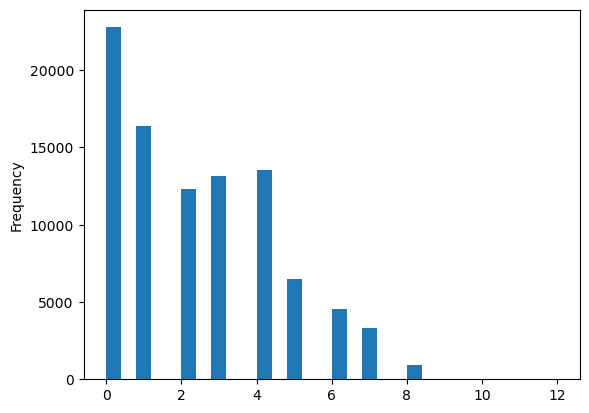

In [14]:
# store these rows to drop problem rows(with to many NA)
probs = df.isnull().sum(axis=1)
print(type(probs))       
probs.plot.hist(bins=30) 
cutoff = 5
df.drop(probs[probs > cutoff].index, inplace=True)
print(f"Have reduced data frame to: {df.shape[0]:,} rows and {df.shape[1]:,} columns")

## Data type change

### Bool

In [15]:
# find cols should be bool but show object
bools = ['host_is_superhost']
df.sample(5, random_state=43)[bools]
# map 't' and 'f' to True and False
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')

Converting host_is_superhost


### Dates

In [16]:
# find cols should be date but show object
dates = ['host_since']
print(f"Currently {dates[0]} is of type '{df[dates[0]].dtype}'", "\n")
df.sample(5, random_state=43)[dates]

for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d])
print(f"Now {dates[0]} is of type '{df[dates[0]].dtype}'", "\n")

Currently host_since is of type 'object' 

Converting host_since
Now host_since is of type 'datetime64[ns]' 



### Category

In [17]:
# find cols should be cats but show object
cats = ['property_type','room_type']

print(f"Currently {cats[1]} is of type '{df[cats[1]].dtype}'", "\n")
df.sample(5, random_state=42)[cats]


Currently room_type is of type 'object' 



,property_type,room_type
23473,Private room in home,Private room
2944,Entire rental unit,Entire home/apt
33647,Entire rental unit,Entire home/apt
24663,Entire rental unit,Entire home/apt
16152,Entire rental unit,Entire home/apt


In [18]:
# see unique value in cols and frequency
print(df[cats[0]].value_counts())
print(df[cats[1]].value_counts())

property_type
Entire rental unit              35478
Private room in rental unit     11564
Private room in home             9796
Entire condo                     8556
Entire home                      7867
                                ...  
Private room in treehouse           1
Riad                                1
Private room in chalet              1
Shared room in vacation home        1
Private room in floor               1
Name: count, Length: 95, dtype: int64
room_type
Entire home/apt    56006
Private room       28171
Shared room          345
Hotel room           180
Name: count, dtype: int64


In [19]:
# convert dtype
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type


### String->

In [20]:
# convert object has numeric meaning 
money = ['price']
df.sample(5, random_state=43)[money]

,price
43988,NaN
32860,NaN
31339,$290.00
35642,$59.00
88571,$89.00


In [21]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(',','').astype('float')

Converting price


In [22]:
df.sample(5, random_state=43)[money]

,price
43988,NaN
32860,NaN
31339,290.0
35642,59.0
88571,89.0


### Integer

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84702 entries, 0 to 93480
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   id                                           84702 non-null  int64         
 1   listing_url                                  84702 non-null  object        
 2   host_id                                      84702 non-null  int64         
 3   host_name                                    84702 non-null  object        
 4   host_since                                   84702 non-null  datetime64[ns]
 5   host_location                                66602 non-null  object        
 6   host_about                                   46051 non-null  object        
 7   host_is_superhost                            84702 non-null  bool          
 8   host_listings_count                          84702 non-null  float64       
 9   

In [24]:
int64_columns = df.select_dtypes(include=['int64']).columns

print("Columns with dtype int64:")
print(int64_columns)


Columns with dtype int64:
Index(['id', 'host_id', 'accommodates', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')


In [25]:
ints  = ['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'accommodates', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_shared_rooms']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting minimum_nights
Converting maximum_nights
Converting availability_365
Converting number_of_reviews
Converting calculated_host_listings_count
Converting calculated_host_listings_count_entire_homes
Converting calculated_host_listings_count_shared_rooms


In [26]:
#check Na NaN
nan_counts = df[ints].isna().sum()
print(nan_counts)


id                                             0
host_id                                        0
host_listings_count                            0
host_total_listings_count                      0
accommodates                                   0
minimum_nights                                 0
maximum_nights                                 0
availability_365                               0
number_of_reviews                              0
calculated_host_listings_count                 0
calculated_host_listings_count_entire_homes    0
calculated_host_listings_count_shared_rooms    0
dtype: int64


# Final check and save clean data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84702 entries, 0 to 93480
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   id                                           84702 non-null  int64         
 1   listing_url                                  84702 non-null  object        
 2   host_id                                      84702 non-null  int64         
 3   host_name                                    84702 non-null  object        
 4   host_since                                   84702 non-null  datetime64[ns]
 5   host_location                                66602 non-null  object        
 6   host_about                                   46051 non-null  object        
 7   host_is_superhost                            84702 non-null  bool          
 8   host_listings_count                          84702 non-null  int64         
 9   

In [28]:
path = os.path.join('data','clean')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Creating data/clean under /home/jovyan/work
Done.
